In [ ]:
import numpy as np
import importlib
import sys
import healpy as hp
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactocentric
import astropy.units as u
import seaborn as sns

from utils.my_units import *

#importlib.reload(sys.modules['utils.load_pulsars'])
from utils.load_pulsars import load_pulsars_fnc
#%%

In [ ]:
### Loading csv file with pulsars data as a panda dataframe
pulsars = load_pulsars_fnc()

#pulsars = pulsars[~pulsars['DECJ'].isna()]
#pulsars = pulsars[~pulsars['DECJ'].isin(['#ERROR!', '#REF!', '#VALUE!'])]
pulsars = pulsars[~pulsars['DECJ'].isin(['#ERROR!'])] # I couldn't find 'J1838-0022g' on the ATNF catalog. It is the only one with DECJ missing
pulsars.replace('NB', 'Narrow Band', inplace=True) 
print(len(pulsars))
#%%

47


In [ ]:
pulsars

,index,NAME,RAJ,DECJ,F0,F1,DIST,F_GW,upper_limits,type,suggested_pipeline,f range or resolution [Hz],fdot range or resolution [Hz/s]
0,0.0,J1757-2745,17:57:55,-27:45:40,56.538013,4.17e-17,8.000,113.076026,2.620000e-26,fdot,narrowband,2.760000e-01,2.130000e-14
1,1.0,B1639+36A/J1641+3627A,16:41:41,+36:27:14.9788,96.362235,6.75e-16,7.100,192.724470,2.380000e-26,fdot,narrowband,5.750000e-01,2.130000e-14
2,0.0,J1748-3009,17:48:24,-30:09:11,103.263527,3.82E-16,5.053,206.527054,7.500000e-27,doublet,analysed in O3,4.600000e-08,2.110000e-15
3,1.0,J0921-5202,9:21,-52:02:00,103.305785,NaN,0.355,206.611570,5.800000e-27,doublet,analysed in O3,4.600000e-08,2.110000e-15
4,2.0,J1748-2446C,17:48:05,-24:46:36,118.538253,8.52e-15,6.900,237.076506,3.050000e-26,fdot,narrowband,1.380000e-01,2.130000e-14
5,3.0,J1910-5959B,19:10:52,-59:59:01,119.648733,1.13e-14,4.000,239.297466,2.320000e-26,fdot,narrowband,6.080000e-01,2.130000e-14
6,2.0,J1122-3546,11:22,-35:46:00,128.205128,NaN,0.656,256.410256,2.370000e-26,doublet,narrowband,4.090000e-01,2.130000e-14
7,3.0,J1546-5925,15:46,-59:25:00,128.205128,NaN,4.000,256.410256,2.360000e-26,doublet,narrowband,6.470000e-01,2.130000e-14
8,4.0,J1801-0857A,18:01:51,-8:57:32,139.360885,9.91e-15,10.600,278.721770,3.440000e-26,fdot,narrowband,2.890000e-01,2.130000e-14
9,6.0,J1551-0658,15:51:07,-6:58:07,141.043724,NaN,1.325,282.087448,5.700000e-27,doublet,analysed in O3,4.600000e-08,2.110000e-15


In [ ]:
# Example RA and Dec in degrees
ra_list = pulsars['RAJ'].to_numpy()
dec_list = pulsars['DECJ'].to_numpy()
coord_list = [ra_list[i]+' '+dec_list[i] for i in range(len(ra_list))]
dist_list = [pulsars.iloc[i]['DIST']*u.kpc for i in range(len(ra_list))]
#coord_list
#%%

In [ ]:
dist_list

[<Quantity 8. kpc>,
 <Quantity 7.1 kpc>,
 <Quantity 5.053 kpc>,
 <Quantity 0.355 kpc>,
 <Quantity 6.9 kpc>,
 <Quantity 4. kpc>,
 <Quantity 0.656 kpc>,
 <Quantity 4. kpc>,
 <Quantity 10.6 kpc>,
 <Quantity 1.325 kpc>,
 <Quantity 6.9 kpc>,
 <Quantity 8.5 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 11.44 kpc>,
 <Quantity 11.44 kpc>,
 <Quantity 5.5 kpc>,
 <Quantity 7.4 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 6.9 kpc>,
 <Quantity 7.924 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 2.926 kpc>,
 <Quantity 4. kpc>,
 <Quantity 10.2 kpc>,
 <Quantity 7.7 kpc>,
 <Quantity 7.9 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 5.2 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 10.6 kpc>,
 <Quantity 10.6 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 0.714 kpc>,
 <Quantity 4.57 kpc>,
 <Quantity 3.2 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 4.74 kpc>,
 <Quantity 4.69 kpc>,
 <Quantity 1.273 kpc>,
 <Quantity 2.629 kpc>,
 <Quantity 2. kpc>,
 <Quantity 2.8 kpc>,
 <Quantity 4.69 kpc>,

In [ ]:
pipelines = pulsars['suggested_pipeline'].unique() #np.unique(pulsars['suggested_pipeline'].to_numpy())

In [ ]:
pipelines

array(['narrowband', 'analysed in O3', '5vec-semicoh', 'all-sky',
       'binary'], dtype=object)

In [ ]:
sky_coord = SkyCoord(coord_list, unit=(u.hourangle, u.deg), distance=dist_list, frame='icrs', obstime='J2000')
galactic_coords = sky_coord.galactic
l = galactic_coords.l.deg
b = galactic_coords.b.deg
#%%

In [ ]:
# Define the Galactocentric frame with the distance from the Sun to the Galactic Center
galactocentric_frame = Galactocentric(galcen_distance=8.122 * u.kpc)

# Convert to Galactocentric coordinates
galactocentric_coords = galactic_coords.transform_to(galactocentric_frame)

# Extract the 3D positions in Galactocentric coordinates
x = galactocentric_coords.cartesian.x.to(u.kpc).value
y = galactocentric_coords.cartesian.y.to(u.kpc).value
z = galactocentric_coords.cartesian.z.to(u.kpc).value

# rotate by 90 degrees x-y plane so that the Sun location is shown better in the plot
xtemp = np.copy(x)
x = -np.copy(y) #x*np.sqrt(2)/2 - y*np.sqrt(2)/2 #
y = np.copy(

SyntaxError: unexpected EOF while parsing (<ipython-input-13-23734eaa1be9>, line 16)

In [ ]:
# Define the Galactocentric frame with the distance from the Sun to the Galactic Center
galactocentric_frame = Galactocentric(galcen_distance=8.122 * u.kpc)

# Convert to Galactocentric coordinates
galactocentric_coords = galactic_coords.transform_to(galactocentric_frame)

# Extract the 3D positions in Galactocentric coordinates
x = galactocentric_coords.cartesian.x.to(u.kpc).value
y = galactocentric_coords.cartesian.y.to(u.kpc).value
z = galactocentric_coords.cartesian.z.to(u.kpc).value

# rotate by 90 degrees x-y plane so that the Sun location is shown better in the plot
xtemp = np.copy(x)
x = -np.copy(y) #x*np.sqrt(2)/2 - y*np.sqrt(2)/2 #
y = np.copy(xtemp) #xtemp*np.sqrt(2)/2 + y*np.sqrt(2)/2
#%%

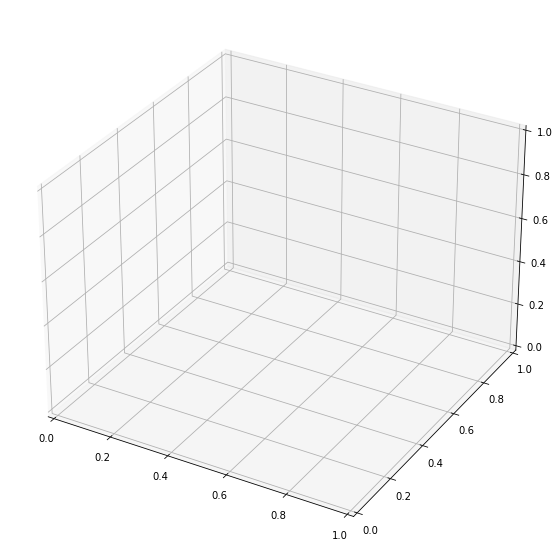

In [ ]:
def plot_sphere(ax, center, radius):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='gray', alpha=0.1)

# 3D plot on a sphere
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
xlim = 10

In [ ]:
# Plot the 3D points
markers = ['D', 'o', '^', 's', 'd', 'p']
colors = sns.color_palette("bright", len(pipelines)) 

for i_p, p_name in enumerate(pipelines): 
    x_temp = x[pulsars['suggested_pipeline'] == p_name]
    y_temp = y[pulsars['suggested_pipeline'] == p_name]
    z_temp = z[pulsars['suggested_pipeline'] == p_name]
    dist_temp = pulsars[pulsars['suggested_pipeline'] == p_name]['DIST'].to_numpy()
    ax.scatter(x_temp, y_temp, z_temp, s=100/(dist_temp)**(1/4), color=colors[i_p], marker=markers[i_p], label=p_name, alpha=0.6)
    for xi, yi, zi in zip(x_temp, y_temp, z_temp):
        ax.plot([xi, xi], [yi, yi], [zi, 0], color=colors[i_p], linestyle='--', linewidth=1)


ax.scatter(0, 0, 0, color='k', s=200,  marker='x', label='GC')
ax.scatter(0, -8.122, 0, color='k', s=300,  marker='$\odot$', label='Sun')

#plot_sphere(ax, [0, 0, 0], 3)
#plot_sphere(ax, [0, 0, 0], 8.122)
plot_sphere(ax, [0, 0, 0], np.max(np.sqrt(x**2 + y**2 + z**2)))

ax.set_xlim(-xlim, xlim)
ax.set_ylim(-xlim, xlim)
ax.set_zlim(-xlim, xlim);
# Remove the background planes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.plot([-xlim, xlim], [0, 0], [0, 0], color='gray', linestyle='-', linewidth=0.5)
ax.plot([-0, 0], [-xlim, xlim], [0, 0], color='gray', linestyle='-', linewidth=0.5)
ax.plot([-0, 0], [0, 0], [-xlim, xlim], color='gray', linestyle='-', linewidth=0.5)

# Remove the axes
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Set the x-axis line color to fully transparent
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Set the y-axis line color to fully transparent
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Set the z-axis line color to fully transparent

# Remove the axis ticks and labels
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_zticks([])  # Remove z-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels
ax.set_zticklabels([])  # Remove z-axis labels


# Set equal aspect ratio
ax.set_box_aspect([1, 1, 1])

#n_points = 1000
#X, Y = np.meshgrid(np.linspace(-xlim, xlim, n_points), np.linspace(-xlim, xlim, n_points))
#X[np.sqrt(X**2 + Y**2) > 5] = np.nan
#Y[np.sqrt(X**2 + Y**2) > 5] = np.nan
#Z = (-0 * X - 0 * Y) * 1. 
#ax.plot_surface(X, Y, Z, color='gray', alpha=0.1)

theta = np.linspace(0, 2*np.pi, 100)
x_circle = 8.122 * np.cos(theta)
y_circle = 8.122 * np.sin(theta)
z_circle = np.zeros_like(theta)  # Z-coordinate of the circle points
ax.plot(x_circle, y_circle, z_circle, color='gray', alpha=0.8, linestyle='--', linewidth=1)

theta = np.linspace(0, 2*np.pi, 100)
x_circle = 5 * np.cos(theta)
y_circle = 5 * np.sin(theta)
z_circle = np.zeros_like(theta)  # Z-coordinate of the circle points
ax.plot(x_circle, y_circle, z_circle, color='gray', alpha=0.8, linewidth=1)

ax.legend(fontsize=20, loc='best', bbox_to_anchor=(-0.5, 0.2, 0.5, 0.5))#loc=[-0.5, 0.3])

In [ ]:
fig.show()

<ipython-input-17-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [ ]:
fig.tight_layout()
fig.savefig('figs/sources_3d.pdf', bbox_inches="tight")

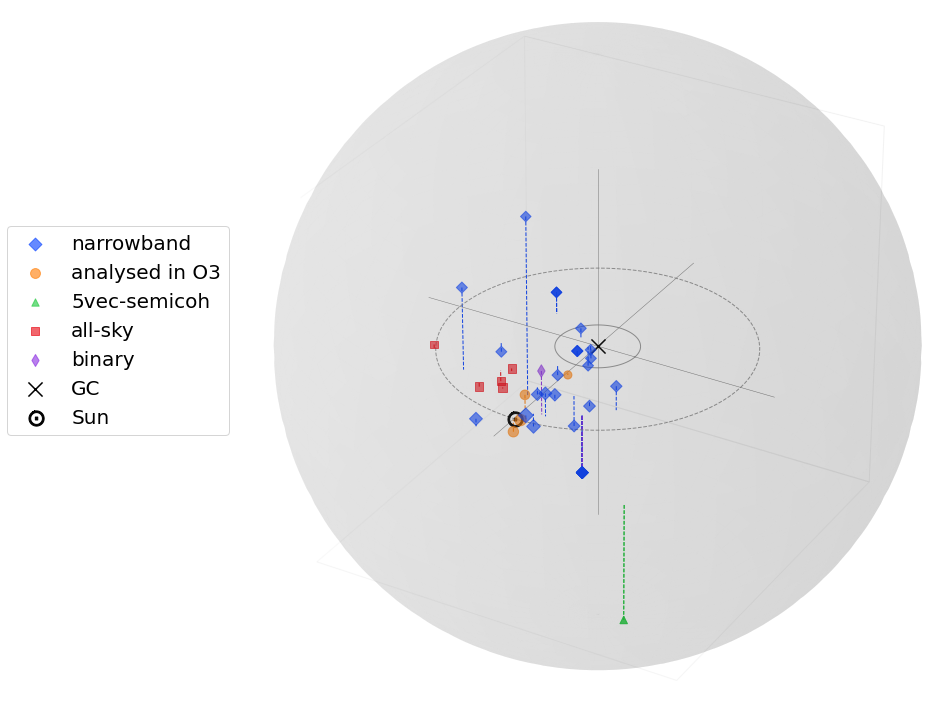

In [ ]:
# Function to plot a sphere
def plot_sphere(ax, center, radius):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='gray', alpha=0.1)

# 3D plot on a sphere
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
xlim = 10

#u = np.linspace(0, 2 * np.pi, 500)
#v = np.linspace(0, xlim, 50)
#x_disc = v[:, np.newaxis] * np.cos(u)
#y_disc = v[:, np.newaxis] * np.sin(u)
#color_intensity = np.exp(-np.sqrt(x_disc**2 + y_disc**2) / 5)
#0 * np.ones_like(x_disc)
#ax.plot_surface(x_disc, y_disc, np.zeros_like(x_disc), 
#                facecolors=plt.cm.Greys(color_intensity), norm=True, alpha=0.1, rstride=1, cstride=1)


# Plot the 3D points
markers = ['D', 'o', '^', 's', 'd', 'p']
colors = sns.color_palette("bright", len(pipelines)) 

for i_p, p_name in enumerate(pipelines): 
    x_temp = x[pulsars['suggested_pipeline'] == p_name]
    y_temp = y[pulsars['suggested_pipeline'] == p_name]
    z_temp = z[pulsars['suggested_pipeline'] == p_name]
    dist_temp = pulsars[pulsars['suggested_pipeline'] == p_name]['DIST'].to_numpy()
    ax.scatter(x_temp, y_temp, z_temp, s=100/(dist_temp)**(1/4), color=colors[i_p], marker=markers[i_p], label=p_name, alpha=0.6)
    for xi, yi, zi in zip(x_temp, y_temp, z_temp):
        ax.plot([xi, xi], [yi, yi], [zi, 0], color=colors[i_p], linestyle='--', linewidth=1)


ax.scatter(0, 0, 0, color='k', s=200,  marker='x', label='GC')
ax.scatter(0, -8.122, 0, color='k', s=300,  marker='$\odot$', label='Sun')

#plot_sphere(ax, [0, 0, 0], 3)
#plot_sphere(ax, [0, 0, 0], 8.122)
plot_sphere(ax, [0, 0, 0], np.max(np.sqrt(x**2 + y**2 + z**2)))

ax.set_xlim(-xlim, xlim)
ax.set_ylim(-xlim, xlim)
ax.set_zlim(-xlim, xlim);
# Remove the background planes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.plot([-xlim, xlim], [0, 0], [0, 0], color='gray', linestyle='-', linewidth=0.5)
ax.plot([-0, 0], [-xlim, xlim], [0, 0], color='gray', linestyle='-', linewidth=0.5)
ax.plot([-0, 0], [0, 0], [-xlim, xlim], color='gray', linestyle='-', linewidth=0.5)

# Remove the axes
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Set the x-axis line color to fully transparent
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Set the y-axis line color to fully transparent
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Set the z-axis line color to fully transparent

# Remove the axis ticks and labels
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_zticks([])  # Remove z-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels
ax.set_zticklabels([])  # Remove z-axis labels


# Set equal aspect ratio
ax.set_box_aspect([1, 1, 1])

#n_points = 1000
#X, Y = np.meshgrid(np.linspace(-xlim, xlim, n_points), np.linspace(-xlim, xlim, n_points))
#X[np.sqrt(X**2 + Y**2) > 5] = np.nan
#Y[np.sqrt(X**2 + Y**2) > 5] = np.nan
#Z = (-0 * X - 0 * Y) * 1. 
#ax.plot_surface(X, Y, Z, color='gray', alpha=0.1)

theta = np.linspace(0, 2*np.pi, 100)
x_circle = 8.122 * np.cos(theta)
y_circle = 8.122 * np.sin(theta)
z_circle = np.zeros_like(theta)  # Z-coordinate of the circle points
ax.plot(x_circle, y_circle, z_circle, color='gray', alpha=0.8, linestyle='--', linewidth=1)

theta = np.linspace(0, 2*np.pi, 100)
x_circle = 2.15 * np.cos(theta)
y_circle = 2.15 * np.sin(theta)
z_circle = np.zeros_like(theta)  # Z-coordinate of the circle points
ax.plot(x_circle, y_circle, z_circle, color='gray', alpha=0.8, linewidth=1)

ax.legend(fontsize=20, loc='best', bbox_to_anchor=(-0.5, 0.2, 0.5, 0.5))#loc=[-0.5, 0.3])
fig.tight_layout()
fig.savefig('figs/sources_3d.pdf', bbox_inches="tight")

In [ ]:
len(pulsars)

47

Number of sources plotted: 47


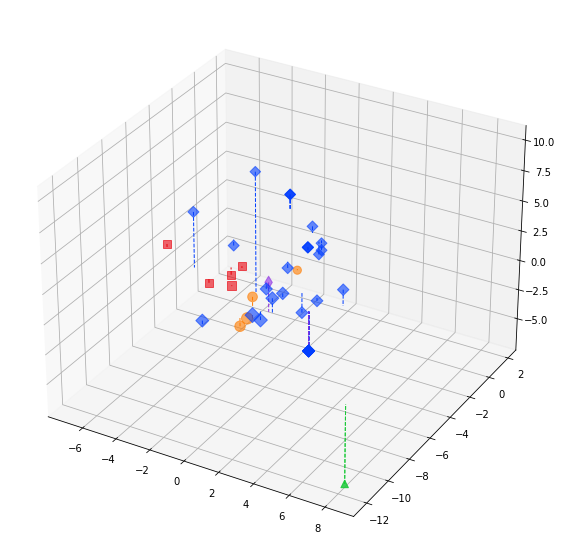

In [ ]:
def plot_sphere(ax, center, radius):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='gray', alpha=0.1)

# 3D plot on a sphere
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
xlim = 10

#u = np.linspace(0, 2 * np.pi, 500)
#v = np.linspace(0, xlim, 50)
#x_disc = v[:, np.newaxis] * np.cos(u)
#y_disc = v[:, np.newaxis] * np.sin(u)
#color_intensity = np.exp(-np.sqrt(x_disc**2 + y_disc**2) / 5)
#0 * np.ones_like(x_disc)
#ax.plot_surface(x_disc, y_disc, np.zeros_like(x_disc), 
#                facecolors=plt.cm.Greys(color_intensity), norm=True, alpha=0.1, rstride=1, cstride=1)


# Plot the 3D points
markers = ['D', 'o', '^', 's', 'd', 'p']
colors = sns.color_palette("bright", len(pipelines)) 

count=0
for i_p, p_name in enumerate(pipelines): 
    x_temp = x[pulsars['suggested_pipeline'] == p_name]
    y_temp = y[pulsars['suggested_pipeline'] == p_name]
    z_temp = z[pulsars['suggested_pipeline'] == p_name]
    dist_temp = pulsars[pulsars['suggested_pipeline'] == p_name]['DIST'].to_numpy()
    ax.scatter(x_temp, y_temp, z_temp, s=100/(dist_temp)**(1/4), color=colors[i_p], marker=markers[i_p], label=p_name, alpha=0.6)
    for xi, yi, zi in zip(x_temp, y_temp, z_temp):
        count+=1
        ax.plot([xi, xi], [yi, yi], [zi, 0], color=colors[i_p], linestyle='--', linewidth=1)
print('Number of sources plotted: {}'.format(count))

In [ ]:
pulsars.NAME

0                J1757-2745
1     B1639+36A/J1641+3627A
2                J1748-3009
3                J0921-5202
4               J1748-2446C
5               J1910-5959B
6                J1122-3546
7                J1546-5925
8               J1801-0857A
9                J1551-0658
10              J1748-2446T
11              J1748-2021C
12    B0021-72C/J0024-7204C
13              J0514-4002N
14              J0514-4002C
15              J1824-2452E
16              J1911+0101B
17    B0021-72D/J0024-7204D
19             J1748-2446ac
20                 J1940+26
21              J0024-7204Z
22              J0024-7204Z
23              J1904+0836g
24              J1953+1844g
25              J1342+2822F
26              J1803-3002B
27              J1823-3021E
28    B0021-72L/J0024-7204L
29              J1326-4728E
30    B0021-72G/J0024-7204G
31    B0021-72G/J0024-7204G
32              J1801-0857C
33              J1801-0857C
34    B0021-72M/J0024-7204M
35    B0021-72M/J0024-7204M
36               J01

In [ ]:
tab1=['J1757-2745', 
'J1641+3627A',
'J1748-2446C', 
'J1910-5959B',
'J1801-0857A',
'J1748-2021C', 
'J0024-7204C',  
'J1911+0101B',  
'J0024-7204D',  
'J0024-7204Z',  
'J0024-7204L',  
'J0024-7204G',  
'J1801-0857C',  
'J0024-7204M',  
'J1836-2354B',  
'J0024-7204N',  
'J1748-3009',  
'J0921-5202',  
'J1122-3546', 
'J1546-5925',  
'J1551-0658',  
'J1748-2446T',  
'J0514-4002N',  
'J0514-4002C',  
'J1824-2452E',  
'J1838-0022g',  
'J1748-2446ac',  
'J1940+26',  
'J0024-7204Z',  
'J1904+0836g',  
'J1953+1844g',  
'J1326-4728E',  
'J0125-2327',  
'J1844+0028g',  
'J1317-0157',  
'J0418+6635',  
'J0024-7204S',  
'J1308-23',  
'J1342+2822F', 
'J1803-3002B',
'J1823-3021E', 
'J0024-7204H', 
'J1930+1403g', 
'J1624-39', 
'J2045-68']

In [ ]:
tab1[1]

'J1641+3627A'

In [ ]:
tab1=np.array(['J1757-2745', 
'J1641+3627A',
'J1748-2446C', 
'J1910-5959B',
'J1801-0857A',
'J1748-2021C', 
'J0024-7204C',  
'J1911+0101B',  
'J0024-7204D',  
'J0024-7204Z',  
'J0024-7204L',  
'J0024-7204G',  
'J1801-0857C',  
'J0024-7204M',  
'J1836-2354B',  
'J0024-7204N',  
'J1748-3009',  
'J0921-5202',  
'J1122-3546', 
'J1546-5925',  
'J1551-0658',  
'J1748-2446T',  
'J0514-4002N',  
'J0514-4002C',  
'J1824-2452E',  
'J1838-0022g',  
'J1748-2446ac',  
'J1940+26',  
'J0024-7204Z',  
'J1904+0836g',  
'J1953+1844g',  
'J1326-4728E',  
'J0125-2327',  
'J1844+0028g',  
'J1317-0157',  
'J0418+6635',  
'J0024-7204S',  
'J1308-23',  
'J1342+2822F', 
'J1803-3002B',
'J1823-3021E', 
'J0024-7204H', 
'J1930+1403g', 
'J1624-39', 
'J2045-68'])
#%%

In [ ]:
np.isin(tab1,pulsars.NAME)

array([ True, False,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True])

In [ ]:
np.isin(pulsars.NAME, tab1)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [ ]:
pulsars.NAME(~np.isin(pulsars.NAME, tab1))

TypeError: 'Series' object is not callable

In [ ]:
pulsars.NAME[~np.isin(pulsars.NAME, tab1)]

1     B1639+36A/J1641+3627A
12    B0021-72C/J0024-7204C
17    B0021-72D/J0024-7204D
28    B0021-72L/J0024-7204L
30    B0021-72G/J0024-7204G
31    B0021-72G/J0024-7204G
34    B0021-72M/J0024-7204M
35    B0021-72M/J0024-7204M
39    B0021-72H/J0024-7204H
41    B0021-72N/J0024-7204N
Name: NAME, dtype: object

In [ ]:
pulsars.iloc[30:32]

,index,NAME,RAJ,DECJ,F0,F1,DIST,F_GW,upper_limits,type,suggested_pipeline,f range or resolution [Hz],fdot range or resolution [Hz/s]
31,24.0,B0021-72G/J0024-7204G,0:24:08,-72:04:40,247.501525,2.58E-15,4.69,495.00305,2.720000e-26,doublet,narrowband,0.166,2.130000e-14
32,27.0,J1801-0857C,18:01:51,-8:57:33,267.472675,4.57E-15,10.60,534.94535,2.910000e-26,doublet,narrowband,0.122,2.130000e-14


In [ ]:
pulsars.iloc[29:31]

,index,NAME,RAJ,DECJ,F0,F1,DIST,F_GW,upper_limits,type,suggested_pipeline,f range or resolution [Hz],fdot range or resolution [Hz/s]
30,11.0,B0021-72G/J0024-7204G,0:24:08,-72:04:40,247.501525,2.58e-15,4.69,495.00305,2.720000e-26,fdot,narrowband,0.166,2.130000e-14
31,24.0,B0021-72G/J0024-7204G,0:24:08,-72:04:40,247.501525,2.58E-15,4.69,495.00305,2.720000e-26,doublet,narrowband,0.166,2.130000e-14


In [ ]:
pulsars.drop_duplicates().shape

(47, 13)

In [ ]:
pulsars.drop_duplicates(subset=['NAME']).shape

(43, 13)

In [ ]:
pulsars.drop_duplicates(subset=['NAME', 'RAJ']).shape

(43, 13)

In [ ]:
tab1.unique().shape

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [ ]:
np.unique(tab1).shape()

TypeError: 'tuple' object is not callable

In [ ]:
np.unique(tab1).shape

(44,)

In [ ]:
np.unique(tab1)

array(['J0024-7204C', 'J0024-7204D', 'J0024-7204G', 'J0024-7204H',
       'J0024-7204L', 'J0024-7204M', 'J0024-7204N', 'J0024-7204S',
       'J0024-7204Z', 'J0125-2327', 'J0418+6635', 'J0514-4002C',
       'J0514-4002N', 'J0921-5202', 'J1122-3546', 'J1308-23',
       'J1317-0157', 'J1326-4728E', 'J1342+2822F', 'J1546-5925',
       'J1551-0658', 'J1624-39', 'J1641+3627A', 'J1748-2021C',
       'J1748-2446C', 'J1748-2446T', 'J1748-2446ac', 'J1748-3009',
       'J1757-2745', 'J1801-0857A', 'J1801-0857C', 'J1803-3002B',
       'J1823-3021E', 'J1824-2452E', 'J1836-2354B', 'J1838-0022g',
       'J1844+0028g', 'J1904+0836g', 'J1910-5959B', 'J1911+0101B',
       'J1930+1403g', 'J1940+26', 'J1953+1844g', 'J2045-68'], dtype='<U12')

In [ ]:
np.unique(tab1, return_inverse=True)

(array(['J0024-7204C', 'J0024-7204D', 'J0024-7204G', 'J0024-7204H',
        'J0024-7204L', 'J0024-7204M', 'J0024-7204N', 'J0024-7204S',
        'J0024-7204Z', 'J0125-2327', 'J0418+6635', 'J0514-4002C',
        'J0514-4002N', 'J0921-5202', 'J1122-3546', 'J1308-23',
        'J1317-0157', 'J1326-4728E', 'J1342+2822F', 'J1546-5925',
        'J1551-0658', 'J1624-39', 'J1641+3627A', 'J1748-2021C',
        'J1748-2446C', 'J1748-2446T', 'J1748-2446ac', 'J1748-3009',
        'J1757-2745', 'J1801-0857A', 'J1801-0857C', 'J1803-3002B',
        'J1823-3021E', 'J1824-2452E', 'J1836-2354B', 'J1838-0022g',
        'J1844+0028g', 'J1904+0836g', 'J1910-5959B', 'J1911+0101B',
        'J1930+1403g', 'J1940+26', 'J1953+1844g', 'J2045-68'], dtype='<U12'),
 array([28, 22, 24, 38, 29, 23,  0, 39,  1,  8,  4,  2, 30,  5, 34,  6, 27,
        13, 14, 19, 20, 25, 12, 11, 33, 35, 26, 41,  8, 37, 42, 17,  9, 36,
        16, 10,  7, 15, 18, 31, 32,  3, 40, 21, 43]))

In [ ]:
, counts = np.unique(tab1, return_counts=True)

('counts', '=', 'np.unique(tab1,', 'return_counts=True)')

In [ ]:
counts

NameError: name 'counts' is not defined

In [ ]:
unique_elements, counts = np.unique(tab1, return_counts=True)

In [ ]:
unique_elements[counts > 1]

array(['J0024-7204Z'], dtype='<U12')